In [498]:
import numpy as np
import time
import matplotlib.pyplot as plt

np.random.seed(1)

You are given a basic, bare-bones neural network written in Numpy in MLP Programming module on canvas. You will take basis in that code and add some modifications. These are as follows:

1: Replace the activation function with the Sigmoid function. Train the network, and compare with the original activation function. What differences did you experience? Why do you think this difference happened?

2: Do a search for the best learning rate. Also experiment with the necessary number of epochs. Use these values for learning rate: [0.001, 0.01, 0.1, 1, 10]. Report on your findings.

3: Add another “hidden” layer(hidden layers exist between the input and output layers). Choose the size of the layer yourself. Retrain the network. Here, your knowledge about learning rate and epochs from the previous task might come in handy. Is this network more or less performant than the previous version? What does this change imply?

4: Understanding the effect of activation function: Repeat the experiment as in 3. but by including an activation functions at various stages as shown. 
CodeCogsEqn(1)-1.png

Above image shows an example network with a first hidden layer of 8 nodes followed by a second hidden layer with 6 nodes. However, in (a) the activation function is applied only after the first hidden layer in (b) the activation function is applied only after the second hidden layer and in (c) the activation function is applied only both the hidden layers. Try to comment on your observations in each of these cases. Also comment if come of these model in (a),(b) or (c) can be altered such the number of weight parameters can be reduced still keeping the over all operations equivalent.

In [499]:

# sigmoid
def sigmoid_function(x):
    return (1/(1 + np.exp(-x)))

def derivative_sigmoid_function(x):
    return (np.exp(-x)/(1 + np.exp(-x))**2)


# default
def relu(x):
    return (x > 0) * x 

def relu_grad(x):
    return x > 0

In [500]:
streetlights = np.array([[1,0,1], 
                         [0,1,1], 
                         [0,0,1], 
                         [1,1,1], 
                         [0,1,1], 
                         [1,0,1]])

In [501]:
walk_vs_stop = np.array([[0], [1], [0], [1], [1], [0]])

In [502]:
X,y = streetlights, walk_vs_stop

In [503]:
hidden_nodes = 8

In [504]:
epochs = 1000  # number of iterations to go through the network

lr = 0.01

lr_array =  [0.001, 0.01, 0.1, 1, 10] #[0.001, 0.01, 0.1,]   # [0.01]  # how much we change the weights of the network each iteration

In [505]:

def training(lr, epochs, activation_function, derivative_function, hidden_nodes):

    errors = []

    ws_1 = np.random.rand(X.shape[1], hidden_nodes) - 0.5
    ws_2 = np.random.rand(hidden_nodes, y.shape[1]) - 0.5

    for epoch in range(epochs):     #number of training iterations, or times to change the weights of the nn
        accumulated_errors = []
        total_errors = 0
        for i in range(X.shape[0]): #for all samples in X, each streetlight
            layer_in = X[i:i+1]

                #forward pass/prediction
            layer_1 = activation_function(layer_in.dot(ws_1))

            layer_out = layer_1.dot(ws_2)

                #calc error/distance (how far are we from goal)
            delta_2 = layer_out - y[i:i+1]

                #calc the the error each node in prev layer contributed
            delta_1 = delta_2.dot(ws_2.T) * derivative_function(layer_1)

                #update weights
            ws_2 -= lr * (layer_1.T.reshape(hidden_nodes,1).dot(delta_2))
            ws_1 -= lr * (layer_in.T.reshape(X.shape[1],1).dot(delta_1))
                
        #if epoch % 10 == 0:    
            error = delta_2**2
            accumulated_errors.append(error[0][0])

        for err in accumulated_errors :
            total_errors += err
            
        errors.append(total_errors/X.shape[0])
        #print(round(error[0][0],6))#, end='\r')
    
    return errors


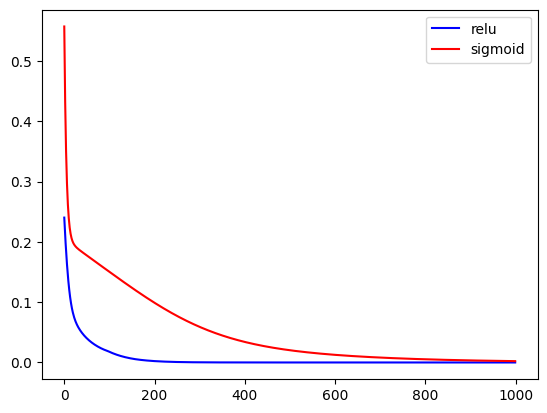

In [506]:
#TASK 1

relu_errors = training([lr], epochs, relu, relu_grad, hidden_nodes)
sigmoid_errors = training([lr], epochs, sigmoid_function, derivative_sigmoid_function, hidden_nodes)

plt.figure(1)
plt.plot(relu_errors, "-b", label="relu")
plt.plot(sigmoid_errors, "-r", label="sigmoid")
plt.legend(loc="upper right")

Task 1:
The above graph takes the learning of each value and averages it out so as to plot a more representative value that includes attempts at both 1 and 0.
By replacing the reLu function with a sigmoid function the curve of plotted line is changed significantly as seen in the comparison of the red and blue lines in the graph obove.
The sigmoid function does provide a change in learning but does so at a slower rate and with a larger difference in error than the reLu function does.
The difference may be attributed to the more gradual shift between 0 and 1 that occur in a sigmoid function than in the reLu function. The relu has an immediate switch between 0 and 1 resulting the full effect of an activation. The sigmoid function on the other hand has a gradient, although small, this gradient may cause less effective activation. This would account for a both greater errors and for a slower learning rate as differences will be more gradual.

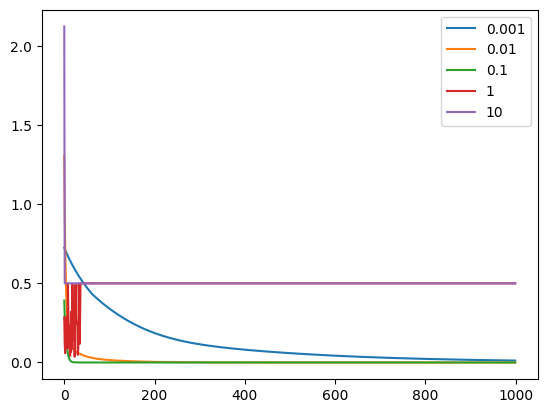

In [507]:
#TASK 2

plt.figure(2)

for lri in lr_array:
    plt.plot(training([lri], epochs, relu, relu_grad, hidden_nodes), label=str(lri))
    
#plt.xlim(0, 100)
plt.legend(loc="upper right")


Task 2:
The above graph compares the 5 learning rates that were provided for this task. It shows that the learning rate has a drastic effect on the number of epochs required before the neural networks learns it's task. With the fastest learning rate seeming to occur at around 0.1, while the least error prone learning occurs around 0.01. Beyond this at 0.001 the neural network does learn the task but it requires a vastly higher number of epochs to perform comparably. Above 0.01, at both 1 and 10, the neural network does not learn the task at all and rather "guesses" the result at a 50% rate. This is probably a result of the neural network's activation threshold being polarized and is defaulting to a single value that is correct half the time.

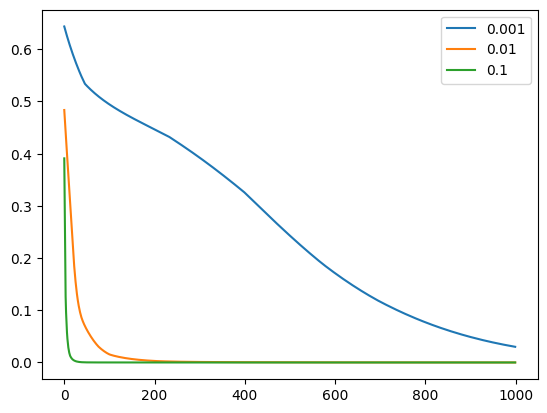

In [508]:
#TASK 3
lr_mn_array = [0.001, 0.01, 0.1]

hidden_nodes_1 = 8
hidden_nodes_mn = 6


def multinode_training(lr_mn, epochs, activation_function, derivative_function, hidden_nodes_l1, hidden_nodes_mn1):

    errors = []

    ws_1 = np.random.rand(X.shape[1], hidden_nodes_l1) - 0.5
    ws_mn1 = np.random.rand(hidden_nodes_l1, hidden_nodes_mn1) - 0.5
    ws_2 = np.random.rand(hidden_nodes_mn1, y.shape[1]) - 0.5

    
    for epoch in range(epochs):     #number of training iterations, or times to change the weights of the nn
        accumulated_errors = []
        total_errors = 0
        for i in range(X.shape[0]): #for all samples in X, each streetlight
            layer_in = X[i:i+1]

                #forward pass/prediction
            layer_1 = activation_function(layer_in.dot(ws_1))

            layer_mn1 = activation_function(layer_1.dot(ws_mn1))

            layer_out = layer_mn1.dot(ws_2)

                #calc error/distance (how far are we from goal)
            delta_2 = layer_out - y[i:i+1]

            delta_mn1 = delta_2.dot(ws_2.T) * derivative_function(layer_mn1)
                #calc the the error each node in prev layer contributed

            delta_1 = delta_mn1.dot(ws_mn1.T) * derivative_function(layer_1)

                #update weights
            ws_2 -= lr_mn * (layer_mn1.T.reshape(hidden_nodes_mn1, 1).dot(delta_2))
            ws_mn1 -= lr_mn * (layer_1.T.reshape(hidden_nodes_l1, 1).dot(delta_mn1))
            ws_1 -= lr_mn * (layer_in.T.reshape(X.shape[1], 1).dot(delta_1))
                
        #if epoch % 10 == 0:    
            error = delta_2**2
            accumulated_errors.append(error[0][0])

        for err in accumulated_errors :
            total_errors += err
            
        errors.append(total_errors/X.shape[0])
    
    return errors

plt.figure(3)
for lr in lr_mn_array:
    plt.plot(multinode_training(lr,epochs, relu, relu_grad, hidden_nodes_1, hidden_nodes_mn), label=str(lr))


plt.legend(loc="upper right")

Task 3:
Adding another hidden layer has a noticable effect on the learning rate of the neural network, though the number of neurons in the second hidden layer is also important. The higher number of nodes in the second network changes the learnign rate, causing faster learning, but also increases the error difference. This effect is only seen for 0.01 0.1 learning rates, while 0.001 experiences a loss in performance. This implies that while the additional layer exaserbates intial errors by further multiplying the weight values, it is capable of reigning the weights in faster as well. The result is an increased rate of learning at the cost of higher preliminary erors when the learning rate is within an optimal value. Beyond this the second layer influences learning negatively.

In [509]:
#TASK 4
hidden_nodes_partial = 6

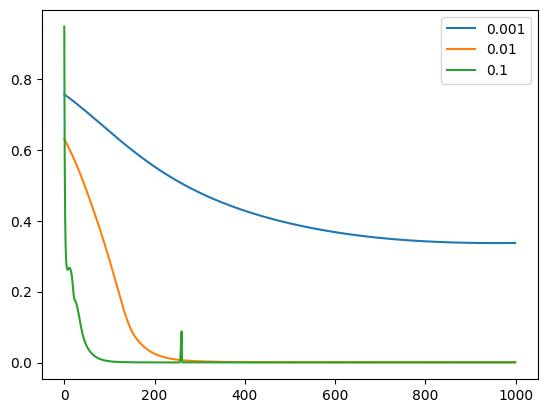

In [510]:
def first_node_training(lr_mn, epochs, activation_function, derivative_function, hidden_nodes_l1, hidden_nodes_mn1):

    errors = []

    ws_1 = np.random.rand(X.shape[1], hidden_nodes_l1) - 0.5
    ws_mn1 = np.random.rand(hidden_nodes_l1, hidden_nodes_mn1) - 0.5
    ws_2 = np.random.rand(hidden_nodes_mn1, y.shape[1]) - 0.5

    
    for epoch in range(epochs):     #number of training iterations, or times to change the weights of the nn
        accumulated_errors = []
        total_errors = 0
        for i in range(X.shape[0]): #for all samples in X, each streetlight
            layer_in = X[i:i+1]

                #forward pass/prediction
            layer_1 = activation_function(layer_in.dot(ws_1))

            layer_mn1 = layer_1.dot(ws_mn1)

            layer_out = layer_mn1.dot(ws_2)

                #calc error/distance (how far are we from goal)
            delta_2 = layer_out - y[i:i+1]

            delta_mn1 = delta_2.dot(ws_2.T) * layer_mn1
                #calc the the error each node in prev layer contributed

            delta_1 = delta_mn1.dot(ws_mn1.T) * derivative_function(layer_1)


                #update weights
            ws_2 -= lr_mn * (layer_mn1.T.reshape(hidden_nodes_mn1, 1).dot(delta_2))
            ws_mn1 -= lr_mn * (layer_1.T.reshape(hidden_nodes_l1, 1).dot(delta_mn1))
            ws_1 -= lr_mn * (layer_in.T.reshape(X.shape[1], 1).dot(delta_1))
                
        #if epoch % 10 == 0:    
            error = delta_2**2
            accumulated_errors.append(error[0][0])

        for err in accumulated_errors :
            total_errors += err
            
        errors.append(total_errors/X.shape[0])
    
    return errors

plt.figure(4)
for lr in lr_mn_array:
    plt.plot(first_node_training(lr,epochs, relu, relu_grad, hidden_nodes_1, hidden_nodes_partial), label=str(lr))


plt.legend(loc="upper right")

Task 4a:
By applying the activation function to only the first hidden layer of the neural network the result is a significantly reduced rate of learning and increased entropy loss. Specifically in the learning rates bellow 0.1 and markedly at the 0.001 rate. Additionally initial error difference is incrased for the 0.1 learning rate.

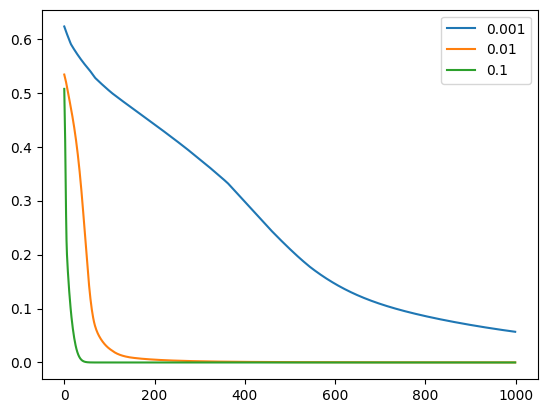

In [511]:
def second_training(lr_mn, epochs, activation_function, derivative_function, hidden_nodes_l1, hidden_nodes_mn1):

    errors = []

    ws_1 = np.random.rand(X.shape[1], hidden_nodes_l1) - 0.5
    ws_mn1 = np.random.rand(hidden_nodes_l1, hidden_nodes_mn1) - 0.5
    ws_2 = np.random.rand(hidden_nodes_mn1, y.shape[1]) - 0.5

    
    for epoch in range(epochs):     #number of training iterations, or times to change the weights of the nn
        accumulated_errors = []
        total_errors = 0
        for i in range(X.shape[0]): #for all samples in X, each streetlight
            layer_in = X[i:i+1]

                #forward pass/prediction
            layer_1 = layer_in.dot(ws_1)

            layer_mn1 = activation_function(layer_1.dot(ws_mn1))

            layer_out = layer_mn1.dot(ws_2)

                #calc error/distance (how far are we from goal)
            delta_2 = layer_out - y[i:i+1]

            delta_mn1 = delta_2.dot(ws_2.T) * derivative_function(layer_mn1)
                #calc the the error each node in prev layer contributed

            delta_1 = delta_mn1.dot(ws_mn1.T) * layer_1


                #update weights
            ws_2 -= lr_mn * (layer_mn1.T.reshape(hidden_nodes_mn1, 1).dot(delta_2))
            ws_mn1 -= lr_mn * (layer_1.T.reshape(hidden_nodes_l1, 1).dot(delta_mn1))
            ws_1 -= lr_mn * (layer_in.T.reshape(X.shape[1], 1).dot(delta_1))
                
        #if epoch % 10 == 0:    
            error = delta_2**2
            accumulated_errors.append(error[0][0])

        for err in accumulated_errors :
            total_errors += err
            
        errors.append(total_errors/X.shape[0])
    return errors

plt.figure(5)
for lr in lr_mn_array:
    plt.plot(second_training(lr,epochs, relu, relu_grad, hidden_nodes_1, hidden_nodes_partial), label=str(lr))


plt.legend(loc="upper right")

Task 4b:
Applying the activation function to the second hidden layer results in a better performance than when the actiavtion function was applied at the first layer, though entropy loss continues to be an issue and performance is still poor when compared to the cases in which both layers have an activation function applied. Initial error difference is also improved compared to only first leyer activation.

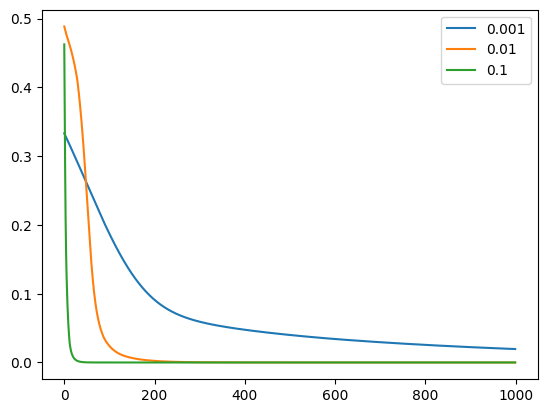

In [512]:
def both_training(lr_mn, epochs, activation_function, derivative_function, hidden_nodes_l1, hidden_nodes_mn1):

    errors = []

    ws_1 = np.random.rand(X.shape[1], hidden_nodes_l1) - 0.5
    ws_mn1 = np.random.rand(hidden_nodes_l1, hidden_nodes_mn1) - 0.5
    ws_2 = np.random.rand(hidden_nodes_mn1, y.shape[1]) - 0.5

    for epoch in range(epochs):     #number of training iterations, or times to change the weights of the nn
        accumulated_errors = []
        total_errors = 0
        for i in range(X.shape[0]): #for all samples in X, each streetlight
            layer_in = X[i:i+1]

                #forward pass/prediction
            layer_1 = activation_function(layer_in.dot(ws_1))

            layer_mn1 = activation_function(layer_1.dot(ws_mn1))

            layer_out = layer_mn1.dot(ws_2)

                #calc error/distance (how far are we from goal)
            delta_2 = layer_out - y[i:i+1]

            delta_mn1 = delta_2.dot(ws_2.T) * derivative_function(layer_mn1)
                #calc the the error each node in prev layer contributed

            delta_1 = delta_mn1.dot(ws_mn1.T) * derivative_function(layer_1)


                #update weights
            ws_2 -= lr_mn * (layer_mn1.T.reshape(hidden_nodes_mn1, 1).dot(delta_2))
            ws_mn1 -= lr_mn * (layer_1.T.reshape(hidden_nodes_l1, 1).dot(delta_mn1))
            ws_1 -= lr_mn * (layer_in.T.reshape(X.shape[1], 1).dot(delta_1))
                
        #if epoch % 10 == 0:    
            error = delta_2**2
            accumulated_errors.append(error[0][0])

        for err in accumulated_errors :
            total_errors += err
            
        errors.append(total_errors/X.shape[0])
    
    return errors

plt.figure(6)
for lr in lr_mn_array:
    plt.plot(both_training(lr,epochs, relu, relu_grad, hidden_nodes_1, hidden_nodes_partial), label=str(lr))


plt.legend(loc="upper right")

Task 4c:
When both hidden layers have the actiavtion function applied the rate of learning is at it's best and the error difference is at it's lowest point. Entropy loss is also at it's best. The results show that additional hidden layers have a marked effect on the neural network's learning, though they are most beneficial when activation occurs and so weights are altered more effectively.

As the weights used are dependant on the activation function it is possible that the number of weight parameters may be reduced on the layer without activation without any significant performance loss.